In [5]:
!pip install matplotlib pillow numpy scikit-learn

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
from sklearn.decomposition import PCA

In [7]:
def load_image_as_matrix(image_path):
    img = Image.open(image_path).convert('L')
    img_matrix = np.array(img, dtype=np.float64)
    return img_matrix, img

In [8]:
def pca_manual(img_matrix, n_components):
    # ตั้งค่าการแสดงผลของ numpy
    np.set_printoptions(precision=3, suppress=True, linewidth=150)

    # ขั้นตอนที่ 1: ทำ Mean Centering
    mean = np.mean(img_matrix, axis=0)
    mean_centered = img_matrix - mean
    print("mean velue =" , mean )
    print("\nMean Centering Matrix:")
    print(mean_centered)


    # ขั้นตอนที่ 2: คำนวณ Covariance Matrix
    covariance_matrix = np.cov(mean_centered, rowvar=False)
    print("\nCovariance Matrix:")
    print(covariance_matrix)

    # ขั้นตอนที่ 3: หา Eigenvalues และ Eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    print("\nEigenvalues:")
    print(eigenvalues)
    print("\nEigenvectors:")
    print(eigenvectors)

    # ขั้นตอนที่ 4: เลือก Eigenvectors ที่สอดคล้องกับค่ามากที่สุด
    sorted_indices = np.argsort(eigenvalues)[::-1]
    top_eigenvectors = eigenvectors[:, sorted_indices[:n_components]]
    print("\nTop Eigenvectors:")
    print(top_eigenvectors)

    # ขั้นตอนที่ 5: แปลงข้อมูลด้วย PCA
    transformed_data = np.dot(mean_centered, top_eigenvectors)
    print("\nTransformed Data:")
    print(transformed_data)

    # ขั้นตอนที่ 6: สร้างข้อมูลกลับ (Reconstruction)
    reconstructed_data = np.dot(transformed_data, top_eigenvectors.T) + np.mean(img_matrix, axis=0) #บวกเพื่อคืนค่าความเข้มแสงให้อยู่ในสภาพเดิม
    print("\nReconstructed Data:")
    print(reconstructed_data)

    return reconstructed_data

In [9]:
def pca_RGB(img_matrix, n_components):
    # แยกช่องสี R, G, B ออกมา
    r_channel = img_matrix[:, :, 0]
    g_channel = img_matrix[:, :, 1]
    b_channel = img_matrix[:, :, 2]

    # ทำ PCA สำหรับแต่ละช่องสี
    r_reconstructed = pca_manual(r_channel, n_components)
    g_reconstructed = pca_manual(g_channel, n_components)
    b_reconstructed = pca_manual(b_channel, n_components)

    # รวมภาพที่ถูกลดมิติจากแต่ละช่องสีกลับมาเป็นภาพ RGB
    reconstructed_image = np.stack((r_reconstructed, g_reconstructed, b_reconstructed), axis=-1)

    return reconstructed_image

In [10]:
def pca(img_matrix, n_components):
  pca = PCA(n_components=n_components)
  pca.fit(img_matrix)
  transformed_data = pca.transform(img_matrix)
  reconstructed_data = pca.inverse_transform(transformed_data)
  return reconstructed_data

In [11]:
print("Please upload an image file:")
uploaded = files.upload()

Please upload an image file:


Saving Te-me_0011.jpg to Te-me_0011.jpg


In [12]:
image_path = next(iter(uploaded))
img_matrix, original_img = load_image_as_matrix(image_path)
print("Image Matrix :")
print(img_matrix)

Image Matrix :
[[  1.   1.   1. ...   1.   3. 178.]
 [  1.   1.   1. ...   1.   3. 178.]
 [  1.   1.   1. ...   1.   3. 178.]
 ...
 [  1.   1.   1. ...   1.   3. 178.]
 [  1.   1.   1. ...   1.   3. 178.]
 [  1.   1.   1. ...   1.   3. 178.]]


In [18]:
n_components = 80
reconstructed_image = pca_manual(img_matrix, n_components)

mean velue = [  1.274   2.242   4.022   4.211   4.57    5.152   5.933   6.09    5.691   4.924   4.982   4.713   2.964   1.448   1.265   1.386   2.52    5.861
  14.646  19.691  19.229  21.242  28.561  31.812  30.619  28.099  32.013  37.031  36.274  29.166  28.493  29.377  28.395  26.695  29.3    31.296
  26.363  23.265  27.022  30.022  29.704  27.798  27.659  26.834  26.677  27.717  29.027  31.484  32.422  34.206  35.915  35.632  36.516  38.776
  38.511  37.117  36.623  36.664  35.283  34.103  33.471  33.547  34.287  33.933  32.296  31.78   31.865  31.946  32.121  32.762  32.103  29.951
  30.767  32.049  29.892  28.502  30.659  31.848  31.251  31.117  32.399  31.933  35.592  39.072  39.444  37.238  34.906  35.74   32.274  27.619
  24.072  23.803  24.87   26.143  27.924  29.605  31.117  32.502  36.484  38.448  36.3    36.22   38.924  39.511  36.475  38.709  45.439  52.996
  53.139  46.363  38.74   33.031  32.646  33.641  31.22   28.78   30.798  33.879  35.852  37.368  34.735  36.229  37.

Text(0.5, 1.0, 'Original Image')

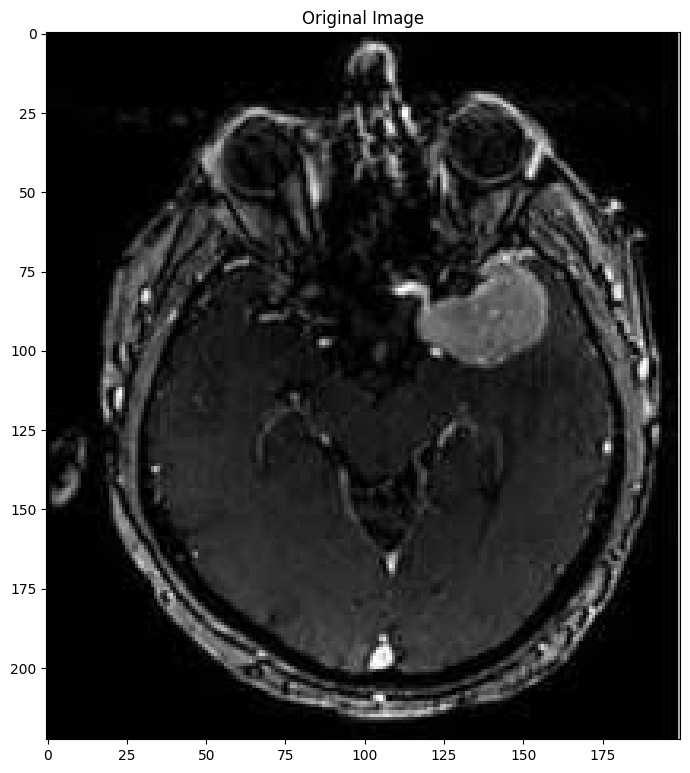

In [14]:
plt.figure(figsize=(18, 16))
plt.subplot(1, 2, 1)
plt.imshow(original_img, cmap='gray')
plt.title('Original Image')

Text(0.5, 1.0, 'PCA Reconstructed (n=80)')

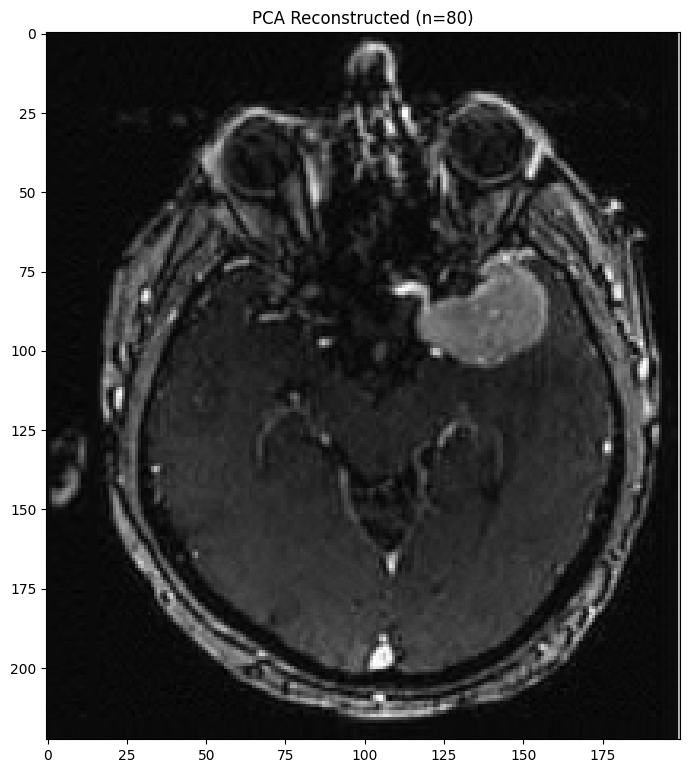

In [19]:
plt.figure(figsize=(18, 16))
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title(f'PCA Reconstructed (n={n_components})')